# Register cellxgene-census metadata - mouse

In [1]:
import lamindb as ln
import lnschema_bionty as lb
import cellxgene_census

2023-09-19 17:02:50,522:INFO - Found credentials in shared credentials file: ~/.aws/credentials


💡 loaded instance: laminlabs/cellxgene-census (lamindb 0.54.0)


In [2]:
lb.settings.species = "mouse"
mouse = lb.settings.species.scientific_name

In [4]:
ln.track()

💡 notebook imports: cellxgene-census==1.3.0 lamin_utils==0.11.2 lamindb==0.54.0 lnschema_bionty==0.31.1


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
Register cellxgene-census metadata - human,wJfHkfyRK0Gpz8,90.47619


💡 Transform(id='9SYGspfpkku9z8', name='Register cellxgene-census metadata - mouse', short_name='mouse-meta', version='0', type=notebook, updated_at=2023-09-19 13:41:48, created_by_id='kmvZDIX9')
💡 Run(id='q5Wm9b8zn9FhwhDHLnbu', run_at=2023-09-19 13:41:48, transform_id='9SYGspfpkku9z8', created_by_id='kmvZDIX9')


In [5]:
census = cellxgene_census.open_soma()

The "stable" release is currently 2023-07-25. Specify 'census_version="2023-07-25"' in future calls to open_soma() to ensure data consistency.
2023-09-19 15:41:53,509:INFO - The "stable" release is currently 2023-07-25. Specify 'census_version="2023-07-25"' in future calls to open_soma() to ensure data consistency.


In [6]:
rna = "RNA"

In [7]:
census_data = census["census_data"][mouse]

## Validate and register genes

Gene metadata:

In [8]:
census_data.ms[rna].var.keys()

('soma_joinid', 'feature_id', 'feature_name', 'feature_length')

In [9]:
gene_metadata = census_data.ms[rna].var.read().concat().to_pandas()

In [10]:
gene_metadata.shape

(52392, 4)

In [11]:
gene_metadata.head()

,soma_joinid,feature_id,feature_name,feature_length
0,0,ENSMUSG00000051951,Xkr4,6094
1,1,ENSMUSG00000089699,Gm1992,250
2,2,ENSMUSG00000102343,Gm37381,1364
3,3,ENSMUSG00000025900,Rp1,12311
4,4,ENSMUSG00000025902,Sox17,4772


In [12]:
lb.Gene.inspect(gene_metadata["feature_id"], field=lb.Gene.ensembl_gene_id);

❗ 52392 terms (100.00%) are not validated for ensembl_gene_id: ENSMUSG00000051951, ENSMUSG00000089699, ENSMUSG00000102343, ENSMUSG00000025900, ENSMUSG00000025902, ENSMUSG00000104328, ENSMUSG00000033845, ENSMUSG00000025903, ENSMUSG00000104217, ENSMUSG00000033813, ENSMUSG00000002459, ENSMUSG00000085623, ENSMUSG00000033793, ENSMUSG00000025905, ENSMUSG00000033774, ENSMUSG00000025907, ENSMUSG00000090031, ENSMUSG00000087247, ENSMUSG00000033740, ENSMUSG00000051285, ...
   detected 52257 Gene terms in Bionty for ensembl_gene_id: 'ENSMUSG00000031883', 'ENSMUSG00000117337', 'ENSMUSG00000108162', 'ENSMUSG00000083933', 'ENSMUSG00000111932', 'ENSMUSG00000099383', 'ENSMUSG00000109601', 'ENSMUSG00000108472', 'ENSMUSG00000070334', 'ENSMUSG00000082900', 'ENSMUSG00000084309', 'ENSMUSG00000111310', 'ENSMUSG00000085150', 'ENSMUSG00000108322', 'ENSMUSG00000082804', 'ENSMUSG00000096903', 'ENSMUSG00000100486', 'ENSMUSG00000116637', 'ENSMUSG00000107465', 'ENSMUSG00000091230', ...
→  add records from Bionty to

In [13]:
# register genes from bionty
gene_records = lb.Gene.from_values(
    gene_metadata["feature_id"], field=lb.Gene.ensembl_gene_id
)
ln.save(gene_records)

validated = lb.Gene.validate(gene_metadata["feature_id"], field=lb.Gene.ensembl_gene_id)
# register legacy genes manually
records = []
for gene_id in gene_metadata["feature_id"][~validated]:
    records.append(lb.Gene(ensembl_gene_id=gene_id))
ln.save(records)

❗ did not create Gene records for 135 non-validated ensembl_gene_ids: 'ENSMUSG00000022591', 'ENSMUSG00000045506', 'ENSMUSG00000053706', 'ENSMUSG00000053861', 'ENSMUSG00000066378', 'ENSMUSG00000066810', 'ENSMUSG00000066936', 'ENSMUSG00000067085', 'ENSMUSG00000067122', 'ENSMUSG00000067292', 'ENSMUSG00000067627', 'ENSMUSG00000067929', 'ENSMUSG00000068181', 'ENSMUSG00000069518', 'ENSMUSG00000072693', 'ENSMUSG00000073290', 'ENSMUSG00000073291', 'ENSMUSG00000073682', 'ENSMUSG00000074210', 'ENSMUSG00000074302', ...
❗ 135 terms (0.30%) are not validated for ensembl_gene_id: ENSMUSG00000022591, ENSMUSG00000094127, ENSMUSG00000066936, ENSMUSG00000091312, ENSMUSG00000098794, ENSMUSG00000079353, ENSMUSG00000096240, ENSMUSG00000079286, ENSMUSG00000085431, ENSMUSG00000075015, ENSMUSG00000075014, ENSMUSG00000078091, ENSMUSG00000075006, ENSMUSG00000079175, ENSMUSG00000079171, ENSMUSG00000079170, ENSMUSG00000079169, ENSMUSG00000090353, ENSMUSG00000100963, ENSMUSG00000079039, ...


In [5]:
feature_set = ln.FeatureSet(
    features=gene_records,
    name="mouse genes",
    modality=ln.Modality.filter(name="RNA").one(),
)

In [6]:
feature_set.save()

## Observational metadata

All available metadata columns:

In [14]:
census_data.obs.keys()

('soma_joinid',
 'dataset_id',
 'assay',
 'assay_ontology_term_id',
 'cell_type',
 'cell_type_ontology_term_id',
 'development_stage',
 'development_stage_ontology_term_id',
 'disease',
 'disease_ontology_term_id',
 'donor_id',
 'is_primary_data',
 'self_reported_ethnicity',
 'self_reported_ethnicity_ontology_term_id',
 'sex',
 'sex_ontology_term_id',
 'suspension_type',
 'tissue',
 'tissue_ontology_term_id',
 'tissue_general',
 'tissue_general_ontology_term_id')

In [15]:
features = ln.Feature.lookup(return_field=ln.Feature.name)

### Validate and register ontologies

Fetch all terms used in census for each ontology:

In [16]:
dfs = {}

for cols in [
    (features.assay, features.assay_ontology_term_id),
    (features.cell_type, features.cell_type_ontology_term_id),
    (features.development_stage, features.development_stage_ontology_term_id),
    (features.disease, features.disease_ontology_term_id),
    (
        features.self_reported_ethnicity,
        features.self_reported_ethnicity_ontology_term_id,
    ),
    (features.sex, features.sex_ontology_term_id),
    (features.tissue, features.tissue_ontology_term_id),
    (features.tissue_general, features.tissue_general_ontology_term_id),
]:
    dfs[cols[0]] = (
        census_data.obs.read(column_names=[cols[0], cols[1]])
        .concat()
        .to_pandas()
        .drop_duplicates()
    )

In [20]:
dfs[features.development_stage].head()

,development_stage,development_stage_ontology_term_id
0,7 weeks,MmusDv:0000051
1,8 weeks,MmusDv:0000052
74,unknown,unknown
269,9 weeks,MmusDv:0000053
1169213,Theiler stage 21,MmusDv:0000028


In [32]:
def register_ontology(orm, name: str, parents: bool = True, **kwargs):
    from lamin_utils import logger

    df = dfs[name]
    records = orm.from_values(
        df[f"{name}_ontology_term_id"], field=orm.ontology_id, **kwargs
    )
    for record in records:
        census_name = df[df[f"{name}_ontology_term_id"] == record.ontology_id][
            name
        ].tolist()[0]
        if census_name != record.name:
            logger.warning(
                f"census name '{census_name}' doesn't match ontology name"
                f" '{record.name}', adding census name as a synonym\n"
            )
            record.add_synonym(census_name)
    name_with_schema = orm.__get_name_with_schema__()
    feature = ln.Feature.filter(name=name).one()
    feature.registries = name_with_schema
    feature.save()
    feature = ln.Feature.filter(name=f"{name}_ontology_term_id").one()
    feature.registries = name_with_schema
    feature.save()
    ln.save(records, parents=parents)

In [33]:
register_ontology(lb.ExperimentalFactor, features.assay)

❗ now recursing through parents: this only happens once, but is much slower than bulk saving


In [34]:
register_ontology(lb.CellType, features.cell_type)

❗ census name 'valve cell' doesn't match ontology name 'obsolete valve cell', adding census name as a synonym

❗ now recursing through parents: this only happens once, but is much slower than bulk saving
❗ now recursing through parents: this only happens once, but is much slower than bulk saving
❗ now recursing through parents: this only happens once, but is much slower than bulk saving
❗ now recursing through parents: this only happens once, but is much slower than bulk saving
❗ now recursing through parents: this only happens once, but is much slower than bulk saving
❗ now recursing through parents: this only happens once, but is much slower than bulk saving
❗ now recursing through parents: this only happens once, but is much slower than bulk saving
❗ now recursing through parents: this only happens once, but is much slower than bulk saving
❗ now recursing through parents: this only happens once, but is much slower than bulk saving
❗ now recursing through parents: this only happens o

In [42]:
mouse_dv = lb.BiontySource.filter(entity="DevelopmentalStage", species="mouse").one()
register_ontology(
    lb.DevelopmentalStage,
    features.development_stage,
    parents=True,
    bionty_source=mouse_dv,
)

❗ did not create DevelopmentalStage record for 1 non-validated ontology_id: 'unknown'
❗ census name '2 month-old stage' doesn't match ontology name '2-month-old stage', adding census name as a synonym

❗ census name '5 month-old stage' doesn't match ontology name '5-month-old stage', adding census name as a synonym

❗ census name '18 month-old stage' doesn't match ontology name '18-month-old stage', adding census name as a synonym

❗ census name '16 month-old stage' doesn't match ontology name '16-month-old stage', adding census name as a synonym

❗ census name '6 month-old stage' doesn't match ontology name '6-month-old stage', adding census name as a synonym

❗ census name '3 month-old stage' doesn't match ontology name '3-month-old stage', adding census name as a synonym

❗ census name '20 month-old stage and over' doesn't match ontology name '20-month-old stage and over', adding census name as a synonym

❗ census name '4 month-old stage' doesn't match ontology name '4-month-old sta

In [44]:
register_ontology(lb.Disease, features.disease)

❗ did not create Disease record for 1 non-validated ontology_id: 'PATO:0000461'


In [45]:
register_ontology(lb.Ethnicity, features.self_reported_ethnicity)

❗ did not create Ethnicity record for 1 non-validated ontology_id: 'na'


In [49]:
pato = lb.BiontySource.filter(source="pato").one()
register_ontology(lb.Phenotype, features.sex, parents=False, bionty_source=pato)

❗ did not create Phenotype record for 1 non-validated ontology_id: 'unknown'


In [50]:
register_ontology(lb.Tissue, features.tissue_general)

❗ now recursing through parents: this only happens once, but is much slower than bulk saving


In [51]:
register_ontology(lb.Tissue, features.tissue)

❗ now recursing through parents: this only happens once, but is much slower than bulk saving
❗ now recursing through parents: this only happens once, but is much slower than bulk saving
❗ now recursing through parents: this only happens once, but is much slower than bulk saving
❗ now recursing through parents: this only happens once, but is much slower than bulk saving
❗ now recursing through parents: this only happens once, but is much slower than bulk saving
❗ now recursing through parents: this only happens once, but is much slower than bulk saving
❗ now recursing through parents: this only happens once, but is much slower than bulk saving
❗ now recursing through parents: this only happens once, but is much slower than bulk saving
❗ now recursing through parents: this only happens once, but is much slower than bulk saving
❗ now recursing through parents: this only happens once, but is much slower than bulk saving
❗ now recursing through parents: this only happens once, but is much s

### Validate and register non-ontological metadata

"donor_id" and "suspension_type" are two fields without public ontologies, let's register them using "ULabel":

In [52]:
features_records = ln.Feature.lookup()

In [53]:
donor_ids = (
    census_data.obs.read(column_names=[features.donor_id])
    .concat()
    .to_pandas()
    .drop_duplicates()
)

Construct a parent "is_donor" to group these ulabels:

In [59]:
records = []
for donor_id in donor_ids[features.donor_id].unique():
    record = ln.ULabel(
        name=donor_id, description=f"mouse {features.donor_id}: {donor_id}"
    )
    records.append(record)

ln.save(records)
is_donor = ln.ULabel.filter(name="is_donor").one()
is_donor.children.set(records)

❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
6,mCUKcdXs,90.0
8,sSh3qUA6,90.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
7,r8WNEQKa,90.0
3,qKA9QC1F,90.0
366,lxkM4Zft,90.0
8,sSh3qUA6,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
6,mCUKcdXs,90.0
5,ziAavljW,90.0
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
10,dyr6QVr3,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
7,r8WNEQKa,90.0
366,lxkM4Zft,90.0
6,mCUKcdXs,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0
5,ziAavljW,90.0
8,sSh3qUA6,90.0
345,NFwl7CS8,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
2,mPtqu17G,90.0
3,qKA9QC1F,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
9,ZogaUWYz,90.0
6,mCUKcdXs,90.0
7,r8WNEQKa,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
6,mCUKcdXs,90.0
5,ziAavljW,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
8,sSh3qUA6,90.0
9,ZogaUWYz,90.0
3,qKA9QC1F,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
5,ziAavljW,90.0
6,mCUKcdXs,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
2,mPtqu17G,90.0
8,sSh3qUA6,90.0
3,qKA9QC1F,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
6,mCUKcdXs,90.0
7,r8WNEQKa,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
4,qpVOoJkD,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
6,mCUKcdXs,90.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
6,mCUKcdXs,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
352_353,ISJ7meOb,92.307692
2,mPtqu17G,90.000000
5,ziAavljW,90.000000
3,qKA9QC1F,90.000000


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
5,ziAavljW,90.0
7,r8WNEQKa,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
90,RlFv7fh0,90.0
9,ZogaUWYz,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
90,RlFv7fh0,90.0
6,mCUKcdXs,90.0
7,r8WNEQKa,90.0
9,ZogaUWYz,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
90,RlFv7fh0,90.0
5,ziAavljW,90.0
9,ZogaUWYz,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
3,qKA9QC1F,90.0
9,ZogaUWYz,90.0
366,lxkM4Zft,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
7,r8WNEQKa,90.0
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0
9,ZogaUWYz,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
2,mPtqu17G,90.0
6,mCUKcdXs,90.0
4,qpVOoJkD,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
9,ZogaUWYz,90.0
5,ziAavljW,90.0
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
8,sSh3qUA6,90.0
2,mPtqu17G,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
2,mPtqu17G,90.0
7,r8WNEQKa,90.0
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
3,qKA9QC1F,90.0
8,sSh3qUA6,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
6,mCUKcdXs,90.0
4,qpVOoJkD,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
4,qpVOoJkD,90.0
10,dyr6QVr3,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
7,r8WNEQKa,90.0
5,ziAavljW,90.0
4,qpVOoJkD,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
8,sSh3qUA6,90.0
7,r8WNEQKa,90.0
5,ziAavljW,90.0
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
3,qKA9QC1F,90.0
7,r8WNEQKa,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
3,qKA9QC1F,90.0
7,r8WNEQKa,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
6,mCUKcdXs,90.0
90,RlFv7fh0,90.0
9,ZogaUWYz,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
8,sSh3qUA6,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
4,qpVOoJkD,90.0
10,dyr6QVr3,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
6,mCUKcdXs,90.0
8,sSh3qUA6,90.0
2,mPtqu17G,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
8,sSh3qUA6,90.0
5,ziAavljW,90.0
7,r8WNEQKa,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
4,qpVOoJkD,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
6,mCUKcdXs,90.0
4,qpVOoJkD,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
6,mCUKcdXs,90.0
7,r8WNEQKa,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
6,mCUKcdXs,90.0
7,r8WNEQKa,90.0
3,qKA9QC1F,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
7,r8WNEQKa,90.0
3,qKA9QC1F,90.0
9,ZogaUWYz,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
8,sSh3qUA6,90.0
4,qpVOoJkD,90.0
10,dyr6QVr3,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
2,mPtqu17G,90.0
90,RlFv7fh0,90.0
4,qpVOoJkD,90.0
9,ZogaUWYz,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
2,mPtqu17G,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
5,ziAavljW,90.0
345,NFwl7CS8,90.0
4,qpVOoJkD,90.0
3,qKA9QC1F,90.0
9,ZogaUWYz,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
8,sSh3qUA6,90.0
3,qKA9QC1F,90.0
9,ZogaUWYz,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
8,sSh3qUA6,90.0
2,mPtqu17G,90.0
5,ziAavljW,90.0
7,r8WNEQKa,90.0
9,ZogaUWYz,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
5,ziAavljW,90.0
6,mCUKcdXs,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
9,ZogaUWYz,90.0
7,r8WNEQKa,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
8,sSh3qUA6,90.0
5,ziAavljW,90.0
6,mCUKcdXs,90.0
7,r8WNEQKa,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
9,ZogaUWYz,90.0
7,r8WNEQKa,90.0
5,ziAavljW,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
180,pX25sNlM,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
10,dyr6QVr3,90.0
180,pX25sNlM,90.0
1804,XaRbJ8Z9,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
180,pX25sNlM,90.0
1804,XaRbJ8Z9,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
180,pX25sNlM,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
180,pX25sNlM,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
donor_5,CiqzUSGr,90.0
donor 5,zcHKFnFo,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
donor 6,Dug4oAbC,90.0
donor_6,BlGGRRRd,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
donor 7,EI1lCz7K,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
donor 8,ZDBAKS7W,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
E1,EnrsAvK9,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
E1,EnrsAvK9,90.0
5,ziAavljW,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
cell,me4qYHoA,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
cell,me4qYHoA,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
cell,me4qYHoA,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
cell,me4qYHoA,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
cell,me4qYHoA,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
cell,me4qYHoA,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
CONTROL,je75yXv1,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
90,RlFv7fh0,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
90,RlFv7fh0,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
90,RlFv7fh0,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
90,RlFv7fh0,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
90,RlFv7fh0,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
90,RlFv7fh0,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
90,RlFv7fh0,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
90,RlFv7fh0,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
90,RlFv7fh0,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
90,RlFv7fh0,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
90,RlFv7fh0,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
90,RlFv7fh0,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
90,RlFv7fh0,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
CONTROL,je75yXv1,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
CONTROL,je75yXv1,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
CONTROL,je75yXv1,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
CONTROL,je75yXv1,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
CONTROL,je75yXv1,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
CONTROL,je75yXv1,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
CONTROL,je75yXv1,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
CONTROL,je75yXv1,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
CONTROL,je75yXv1,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
CONTROL,je75yXv1,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
CONTROL,je75yXv1,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
CONTROL,je75yXv1,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
18_18,wdjtSWm8,95.0
53_53,6CR9RV52,95.0
1,RUka10TP,90.0
3,qKA9QC1F,90.0
8,sSh3qUA6,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
18_18,wdjtSWm8,95.0
45_45,jq5DGPkB,95.0
1,RUka10TP,90.0
8,sSh3qUA6,90.0
4,qpVOoJkD,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
18_18,wdjtSWm8,95.0
47_47,eNMIzSDf,95.0
1,RUka10TP,90.0
4,qpVOoJkD,90.0
8,sSh3qUA6,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
18_18,wdjtSWm8,95.0
46_46,FB6cJwk2,95.0
1,RUka10TP,90.0
4,qpVOoJkD,90.0
8,sSh3qUA6,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
60_60,RmOPCnHd,95.0
24_24,0gZgxBNi,95.0
6,mCUKcdXs,90.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
24_24,0gZgxBNi,95.0
4,qpVOoJkD,90.0
5,ziAavljW,90.0
9,ZogaUWYz,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
24_24,0gZgxBNi,95.0
61_61,xhwvSiqK,95.0
1,RUka10TP,90.0
4,qpVOoJkD,90.0
6,mCUKcdXs,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
24_24,0gZgxBNi,95.0
58_58,ApsTQLMx,95.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0
5,ziAavljW,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
39_39,7RNHd8dq,95.0
3_3,OGCO2PYw,90.0
9,ZogaUWYz,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
38_38,V7ndKgWI,95.0
8,sSh3qUA6,90.0
3,qKA9QC1F,90.0
3_3,OGCO2PYw,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
56_56,p3o3oTf9,95.0
5,ziAavljW,90.0
6,mCUKcdXs,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
9,ZogaUWYz,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
10_10,jVEFCJGX,95.0
3,qKA9QC1F,90.0
10,dyr6QVr3,90.0
1,RUka10TP,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
11_11,5ApBOHXN,95.0
3,qKA9QC1F,90.0
1,RUka10TP,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
10,dyr6QVr3,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
57_57,UbaX0SdK,95.0
5,ziAavljW,90.0
7,r8WNEQKa,90.0
3,qKA9QC1F,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
3_3,OGCO2PYw,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
55_55,K41oH1ZG,95.0
2,mPtqu17G,90.0
5,ziAavljW,90.0
1,RUka10TP,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
48_48,mu7ilSlC,95.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0
8,sSh3qUA6,90.0
1,RUka10TP,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
54_54,ss41WeZX,95.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0
5,ziAavljW,90.0
1,RUka10TP,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
24_24,0gZgxBNi,95.0
60_60,RmOPCnHd,95.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
50_50,hLphuH5g,95.0
18_18,wdjtSWm8,95.0
1,RUka10TP,90.0
5,ziAavljW,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
18_18,wdjtSWm8,95.0
51_51,GQZNlQa9,95.0
1,RUka10TP,90.0
5,ziAavljW,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
18_18,wdjtSWm8,95.0
52_52,QL9O9VgT,95.0
1,RUka10TP,90.0
2,mPtqu17G,90.0
8,sSh3qUA6,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
18_18,wdjtSWm8,95.0
53_53,6CR9RV52,95.0
1,RUka10TP,90.0
3,qKA9QC1F,90.0
8,sSh3qUA6,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
54_54,ss41WeZX,95.0
5,ziAavljW,90.0
1,RUka10TP,90.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
55_55,K41oH1ZG,95.0
1,RUka10TP,90.0
2,mPtqu17G,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
24_24,0gZgxBNi,95.0
58_58,ApsTQLMx,95.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0
5,ziAavljW,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
24_24,0gZgxBNi,95.0
4,qpVOoJkD,90.0
5,ziAavljW,90.0
9,ZogaUWYz,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
61_61,xhwvSiqK,95.0
24_24,0gZgxBNi,95.0
6,mCUKcdXs,90.0
4,qpVOoJkD,90.0
1,RUka10TP,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
63_63,fTLvfyHE,95.0
3,qKA9QC1F,90.0
6,mCUKcdXs,90.0
1,RUka10TP,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
30_30,qFbAAVuG,95.0
3,qKA9QC1F,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
30_30,qFbAAVuG,95.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
30_30,qFbAAVuG,95.0
4,qpVOoJkD,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
30_30,qFbAAVuG,95.0
5,ziAavljW,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
2,mPtqu17G,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
9,ZogaUWYz,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
8,sSh3qUA6,90.0
9,ZogaUWYz,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
56_56,p3o3oTf9,95.0
5,ziAavljW,90.0
6,mCUKcdXs,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
57_57,UbaX0SdK,95.0
5,ziAavljW,90.0
7,r8WNEQKa,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
6,mCUKcdXs,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
8,sSh3qUA6,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
9,ZogaUWYz,90.0
5,ziAavljW,90.0
6,mCUKcdXs,90.0
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
9,ZogaUWYz,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
3,qKA9QC1F,90.0
9,ZogaUWYz,90.0
5,ziAavljW,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
6,mCUKcdXs,90.0
9,ZogaUWYz,90.0
90,RlFv7fh0,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
6,mCUKcdXs,90.0
259,aj3jYcnw,90.0
5,ziAavljW,90.0
9,ZogaUWYz,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
8,sSh3qUA6,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
9,ZogaUWYz,90.0
7,r8WNEQKa,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
9,ZogaUWYz,90.0
8,sSh3qUA6,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
7,r8WNEQKa,90.0
4,qpVOoJkD,90.0
8,sSh3qUA6,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
5,ziAavljW,90.0
6,mCUKcdXs,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
8,sSh3qUA6,90.0
7,r8WNEQKa,90.0
5,ziAavljW,90.0
2,mPtqu17G,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
6,mCUKcdXs,90.0
90,RlFv7fh0,90.0
3,qKA9QC1F,90.0
9,ZogaUWYz,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
7,r8WNEQKa,90.0
6,mCUKcdXs,90.0
9,ZogaUWYz,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
6,mCUKcdXs,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
8,sSh3qUA6,90.0
3,qKA9QC1F,90.0
7,r8WNEQKa,90.0
9,ZogaUWYz,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
8,sSh3qUA6,90.0
6,mCUKcdXs,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
5,ziAavljW,90.0
4,qpVOoJkD,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
5,ziAavljW,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
3,qKA9QC1F,90.0
9,ZogaUWYz,90.0
7,r8WNEQKa,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
5,ziAavljW,90.0
9,ZogaUWYz,90.0
8,sSh3qUA6,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
3,qKA9QC1F,90.0
10,dyr6QVr3,90.0
6,mCUKcdXs,90.0
9,ZogaUWYz,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
6,mCUKcdXs,90.0
7,r8WNEQKa,90.0
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
5,ziAavljW,90.0
8,sSh3qUA6,90.0
3,qKA9QC1F,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
8,sSh3qUA6,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
5,ziAavljW,90.0
2,mPtqu17G,90.0
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
5,ziAavljW,90.0
6,mCUKcdXs,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
7,r8WNEQKa,90.0
3,qKA9QC1F,90.0
9,ZogaUWYz,90.0
90,RlFv7fh0,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
3,qKA9QC1F,90.0
2,mPtqu17G,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
8,sSh3qUA6,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
8,sSh3qUA6,90.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
3,qKA9QC1F,90.0
7,r8WNEQKa,90.0
2,mPtqu17G,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
5,ziAavljW,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
9,ZogaUWYz,90.0
8,sSh3qUA6,90.0
4,qpVOoJkD,90.0
5,ziAavljW,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
6,mCUKcdXs,90.0
9,ZogaUWYz,90.0
2,mPtqu17G,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
6,mCUKcdXs,90.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
9,ZogaUWYz,90.0
6,mCUKcdXs,90.0
7,r8WNEQKa,90.0
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
8,sSh3qUA6,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
3,qKA9QC1F,90.0
9,ZogaUWYz,90.0
7,r8WNEQKa,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
4,qpVOoJkD,90.0
3,qKA9QC1F,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
1418,j4qycPsH,90.0
8,sSh3qUA6,90.0
4,qpVOoJkD,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
9,ZogaUWYz,90.0
5,ziAavljW,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
8,sSh3qUA6,90.0
2,mPtqu17G,90.0
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
9,ZogaUWYz,90.0
7,r8WNEQKa,90.0
8,sSh3qUA6,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
6,mCUKcdXs,90.0
3,qKA9QC1F,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
4,qpVOoJkD,90.0
3,qKA9QC1F,90.0
7,r8WNEQKa,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
6,mCUKcdXs,90.0
4,qpVOoJkD,90.0
2,mPtqu17G,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
7,r8WNEQKa,90.0
2,mPtqu17G,90.0
8,sSh3qUA6,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
4,qpVOoJkD,90.0
7,r8WNEQKa,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
9,ZogaUWYz,90.0
5,ziAavljW,90.0
7,r8WNEQKa,90.0
90,RlFv7fh0,90.0
4,qpVOoJkD,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
7,r8WNEQKa,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
8,sSh3qUA6,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
4,qpVOoJkD,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
P-M003,bGImplQE,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
P-M002,n0NNfPsJ,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
8,sSh3qUA6,90.0
P-M008,H1tQpFQi,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
7,r8WNEQKa,90.0
P-M007,LRgE7L1N,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
P-M004,XlP2p4cL,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
6,mCUKcdXs,90.0
P-M006,evGbOSGv,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
7,r8WNEQKa,90.0
6,mCUKcdXs,90.0
8,sSh3qUA6,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
7,r8WNEQKa,90.0
2,mPtqu17G,90.0
3,qKA9QC1F,90.0
9,ZogaUWYz,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
7,r8WNEQKa,90.0
6,mCUKcdXs,90.0
3,qKA9QC1F,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
5,ziAavljW,90.0
9,ZogaUWYz,90.0
4,qpVOoJkD,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
9,ZogaUWYz,90.0
8,sSh3qUA6,90.0
3,qKA9QC1F,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
3,qKA9QC1F,90.0
9,ZogaUWYz,90.0
198,WUnEFnXt,90.0
5,ziAavljW,90.0
6,mCUKcdXs,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
3,qKA9QC1F,90.0
3535,4xhFxZDR,90.0
8,sSh3qUA6,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
198,WUnEFnXt,90.0
9,ZogaUWYz,90.0
3,qKA9QC1F,90.0
8,sSh3qUA6,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
9,ZogaUWYz,90.0
4,qpVOoJkD,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
9,ZogaUWYz,90.0
5,ziAavljW,90.0
7,r8WNEQKa,90.0
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
8,sSh3qUA6,90.0
6,mCUKcdXs,90.0
4,qpVOoJkD,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
4,qpVOoJkD,90.0
3,qKA9QC1F,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
6,mCUKcdXs,90.0
4,qpVOoJkD,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
5,ziAavljW,90.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
5,ziAavljW,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
5,ziAavljW,90.0
4,qpVOoJkD,90.0
2,mPtqu17G,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
2,mPtqu17G,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
6,mCUKcdXs,90.0
161,XEFfb54y,90.0
5,ziAavljW,90.0
1615,ghEDzHcQ,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
8,sSh3qUA6,90.0
7,r8WNEQKa,90.0
4,qpVOoJkD,90.0
144,L7vL7mNQ,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
4,qpVOoJkD,90.0
3,qKA9QC1F,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
2,mPtqu17G,90.0
7,r8WNEQKa,90.0
6,mCUKcdXs,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
6,mCUKcdXs,90.0
2,mPtqu17G,90.0
1621,Gi9a7eNj,90.0
10,dyr6QVr3,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
6,mCUKcdXs,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
1472,mEFRqUKM,90.0
7,r8WNEQKa,90.0
4,qpVOoJkD,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
2,mPtqu17G,90.0
9,ZogaUWYz,90.0
7,r8WNEQKa,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
7,r8WNEQKa,90.0
2,mPtqu17G,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
3,qKA9QC1F,90.0
8,sSh3qUA6,90.0
7,r8WNEQKa,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
8,sSh3qUA6,90.0
4,qpVOoJkD,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
8,sSh3qUA6,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
6,mCUKcdXs,90.0
5,ziAavljW,90.0
1569,Y0221dcW,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
1569,Y0221dcW,90.0
8,sSh3qUA6,90.0
6,mCUKcdXs,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
5,ziAavljW,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
4,qpVOoJkD,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
8,sSh3qUA6,90.0
5,ziAavljW,90.0
4,qpVOoJkD,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
8,sSh3qUA6,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
5,ziAavljW,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
5,ziAavljW,90.0
4,qpVOoJkD,90.0
2,mPtqu17G,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
2,mPtqu17G,90.0
7,r8WNEQKa,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
5,ziAavljW,90.0
2,mPtqu17G,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
4,qpVOoJkD,90.0
3,qKA9QC1F,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
10,dyr6QVr3,90.0
7,r8WNEQKa,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
8,sSh3qUA6,90.0
4,qpVOoJkD,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
2,mPtqu17G,90.0
6,mCUKcdXs,90.0
4,qpVOoJkD,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
5,ziAavljW,90.0
1588,b8RMuW13,90.0
2,mPtqu17G,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
5,ziAavljW,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
161,XEFfb54y,90.0
6,mCUKcdXs,90.0
5,ziAavljW,90.0
10,dyr6QVr3,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
6,mCUKcdXs,90.0
5,ziAavljW,90.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
3,qKA9QC1F,90.0
8,sSh3qUA6,90.0
9,ZogaUWYz,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
8,sSh3qUA6,90.0
6,mCUKcdXs,90.0
2,mPtqu17G,90.0
1586,PkGfLl20,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
7,r8WNEQKa,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
3,qKA9QC1F,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
8,sSh3qUA6,90.0
6,mCUKcdXs,90.0
4,qpVOoJkD,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
8,sSh3qUA6,90.0
3,qKA9QC1F,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
3,qKA9QC1F,90.0
9,ZogaUWYz,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
4,qpVOoJkD,90.0
9,ZogaUWYz,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
3,qKA9QC1F,90.0
9,ZogaUWYz,90.0
6,mCUKcdXs,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
6,mCUKcdXs,90.0
336,TGHchMdd,90.0
3,qKA9QC1F,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
2,mPtqu17G,90.0
8,sSh3qUA6,90.0
6,mCUKcdXs,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
6,mCUKcdXs,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
3,qKA9QC1F,90.0
1633,oNVVQh2b,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
2,mPtqu17G,90.0
8,sSh3qUA6,90.0
6,mCUKcdXs,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
6,mCUKcdXs,90.0
4,qpVOoJkD,90.0
9,ZogaUWYz,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
7,r8WNEQKa,90.0
6,mCUKcdXs,90.0
1760,qmSn2bym,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
5,ziAavljW,90.0
6,mCUKcdXs,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
8,sSh3qUA6,90.0
6,mCUKcdXs,90.0
5,ziAavljW,90.0
2,mPtqu17G,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
5,ziAavljW,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
2,mPtqu17G,90.0
8,sSh3qUA6,90.0
6,mCUKcdXs,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
6,mCUKcdXs,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
7,r8WNEQKa,90.0
6,mCUKcdXs,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
3,qKA9QC1F,90.0
2,mPtqu17G,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
8,sSh3qUA6,90.0
1582,L6wmy2M0,90.0
5,ziAavljW,90.0
218,PEc5xkE9,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
8,sSh3qUA6,90.0
5,ziAavljW,90.0
2,mPtqu17G,90.0
1582,L6wmy2M0,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
144,L7vL7mNQ,90.0
6,mCUKcdXs,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
4,qpVOoJkD,90.0
144,L7vL7mNQ,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
6,mCUKcdXs,90.0
4,qpVOoJkD,90.0
2,mPtqu17G,90.0
1672,gBGseHMj,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
6,mCUKcdXs,90.0
3,qKA9QC1F,90.0
1672,gBGseHMj,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
6,mCUKcdXs,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
5,ziAavljW,90.0
8,sSh3qUA6,90.0
6,mCUKcdXs,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
7,r8WNEQKa,90.0
5,ziAavljW,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
5,ziAavljW,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
P-M001,4wbuewk6,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
1,RUka10TP,90.0


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
8,sSh3qUA6,90.0
4,qpVOoJkD,90.0
7,r8WNEQKa,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
8,sSh3qUA6,90.0
2,mPtqu17G,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
5,ziAavljW,90.0
8,sSh3qUA6,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
2,mPtqu17G,90.0
5,ziAavljW,90.0
6,mCUKcdXs,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
7,r8WNEQKa,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
7,r8WNEQKa,90.0
3,qKA9QC1F,90.0
5,ziAavljW,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
6,mCUKcdXs,90.0
8,sSh3qUA6,90.0
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
8,sSh3qUA6,90.0
4,qpVOoJkD,90.0
2,mPtqu17G,90.0
9,ZogaUWYz,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
3282,StRBFKJq,90.0
8,sSh3qUA6,90.0
3,qKA9QC1F,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
7,r8WNEQKa,90.0
8,sSh3qUA6,90.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0
5,ziAavljW,90.0
9,ZogaUWYz,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
5,ziAavljW,90.0
2,mPtqu17G,90.0
3,qKA9QC1F,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
2,mPtqu17G,90.0
5,ziAavljW,90.0
219,2RseuKvZ,90.0
3,qKA9QC1F,90.0
9,ZogaUWYz,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
6,mCUKcdXs,90.0
5,ziAavljW,90.0
4,qpVOoJkD,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
5,ziAavljW,90.0
9,ZogaUWYz,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
1251,EV41TWrV,90.0
2,mPtqu17G,90.0
3,qKA9QC1F,90.0
10,dyr6QVr3,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
4,qpVOoJkD,90.0
8,sSh3qUA6,90.0
5,ziAavljW,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
10,dyr6QVr3,90.0
4,qpVOoJkD,90.0
2,mPtqu17G,90.0
9,ZogaUWYz,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
8,sSh3qUA6,90.0
9,ZogaUWYz,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
3,qKA9QC1F,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
3,qKA9QC1F,90.0
9,ZogaUWYz,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
8,sSh3qUA6,90.0
10,dyr6QVr3,90.0
4,qpVOoJkD,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
8,sSh3qUA6,90.0
3,qKA9QC1F,90.0
5,ziAavljW,90.0
7,r8WNEQKa,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
7,r8WNEQKa,90.0
2,mPtqu17G,90.0
8,sSh3qUA6,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
4,qpVOoJkD,90.0
3,qKA9QC1F,90.0
2,mPtqu17G,90.0
10,dyr6QVr3,90.0
9,ZogaUWYz,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
6,mCUKcdXs,90.0
7,r8WNEQKa,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
4,qpVOoJkD,90.0
9,ZogaUWYz,90.0
6,mCUKcdXs,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
8,sSh3qUA6,90.0
6,mCUKcdXs,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
5,ziAavljW,90.0
2,mPtqu17G,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
5,ziAavljW,90.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
7,r8WNEQKa,90.0
2,mPtqu17G,90.0
9,ZogaUWYz,90.0
259,aj3jYcnw,90.0
4,qpVOoJkD,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
2,mPtqu17G,90.0
6,mCUKcdXs,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
184,gBPfbxaZ,90.0
8,sSh3qUA6,90.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0
3,qKA9QC1F,90.0
318,T9QYgHXj,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
4,qpVOoJkD,90.0
3,qKA9QC1F,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
8,sSh3qUA6,90.0
6,mCUKcdXs,90.0
7,r8WNEQKa,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
8,sSh3qUA6,90.0
4,qpVOoJkD,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
5,ziAavljW,90.0
3,qKA9QC1F,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
8,sSh3qUA6,90.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0
6,mCUKcdXs,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
5,ziAavljW,90.0
8,sSh3qUA6,90.0
4,qpVOoJkD,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
8,sSh3qUA6,90.0
7,r8WNEQKa,90.0
3,qKA9QC1F,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
10,dyr6QVr3,90.0
3,qKA9QC1F,90.0
5,ziAavljW,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
5,ziAavljW,90.0
9,ZogaUWYz,90.0
2,mPtqu17G,90.0
259,aj3jYcnw,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
5,ziAavljW,90.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
5,ziAavljW,90.0
8,sSh3qUA6,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
7,r8WNEQKa,90.0
9,ZogaUWYz,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
4,qpVOoJkD,90.0
6,mCUKcdXs,90.0
9,ZogaUWYz,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
5,ziAavljW,90.0
6,mCUKcdXs,90.0
9,ZogaUWYz,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
2,mPtqu17G,90.0
8,sSh3qUA6,90.0
7,r8WNEQKa,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
3,qKA9QC1F,90.0
7,r8WNEQKa,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
8,sSh3qUA6,90.0
3,qKA9QC1F,90.0
366,lxkM4Zft,90.0
90,RlFv7fh0,90.0
9,ZogaUWYz,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
8,sSh3qUA6,90.0
7,r8WNEQKa,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
6,mCUKcdXs,90.0
2,mPtqu17G,90.0
5,ziAavljW,90.0
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
7,r8WNEQKa,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
3,qKA9QC1F,90.0
5,ziAavljW,90.0
7,r8WNEQKa,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
8,sSh3qUA6,90.0
9,ZogaUWYz,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
5,ziAavljW,90.0
3,qKA9QC1F,90.0
9,ZogaUWYz,90.0
4,qpVOoJkD,90.0
7,r8WNEQKa,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
8,sSh3qUA6,90.0
2,mPtqu17G,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
4,qpVOoJkD,90.0
3,qKA9QC1F,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
6,mCUKcdXs,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
3,qKA9QC1F,90.0
5,ziAavljW,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
9,ZogaUWYz,90.0
5,ziAavljW,90.0
6,mCUKcdXs,90.0
7,r8WNEQKa,90.0
2,mPtqu17G,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
6,mCUKcdXs,90.0
7,r8WNEQKa,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
2,mPtqu17G,90.0
9,ZogaUWYz,90.0
10,dyr6QVr3,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
4,qpVOoJkD,90.0
6,mCUKcdXs,90.0
2,mPtqu17G,90.0
9,ZogaUWYz,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
2,mPtqu17G,90.0
5,ziAavljW,90.0
9,ZogaUWYz,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
4,qpVOoJkD,90.0
6,mCUKcdXs,90.0
3,qKA9QC1F,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
6,mCUKcdXs,90.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
4,qpVOoJkD,90.0
3,qKA9QC1F,90.0
2,mPtqu17G,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
7,r8WNEQKa,90.0
6,mCUKcdXs,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
2,mPtqu17G,90.0
7,r8WNEQKa,90.0
4,qpVOoJkD,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
8,sSh3qUA6,90.0
7,r8WNEQKa,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
5,ziAavljW,90.0
259,aj3jYcnw,90.0
2,mPtqu17G,90.0
9,ZogaUWYz,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
7,r8WNEQKa,90.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0
6,mCUKcdXs,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
4,qpVOoJkD,90.0
3,qKA9QC1F,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
7,r8WNEQKa,90.0
8,sSh3qUA6,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
7,r8WNEQKa,90.0
9,ZogaUWYz,90.0
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
4,qpVOoJkD,90.0
5,ziAavljW,90.0
2,mPtqu17G,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
5,ziAavljW,90.0
9,ZogaUWYz,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
7,r8WNEQKa,90.0
8,sSh3qUA6,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
4,qpVOoJkD,90.0
8,sSh3qUA6,90.0
2,mPtqu17G,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
4,qpVOoJkD,90.0
3,qKA9QC1F,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
9,ZogaUWYz,90.0
5,ziAavljW,90.0
6,mCUKcdXs,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
6,mCUKcdXs,90.0
8,sSh3qUA6,90.0
5,ziAavljW,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
5,ziAavljW,90.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0
3,qKA9QC1F,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
5,ziAavljW,90.0
6,mCUKcdXs,90.0
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
9,ZogaUWYz,90.0
2,mPtqu17G,90.0
259,aj3jYcnw,90.0
5,ziAavljW,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
90,RlFv7fh0,90.0
3,qKA9QC1F,90.0
9,ZogaUWYz,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
5,ziAavljW,90.0
8,sSh3qUA6,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
9,ZogaUWYz,90.0
5,ziAavljW,90.0
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
5,ziAavljW,90.0
6,mCUKcdXs,90.0
7,r8WNEQKa,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
318,T9QYgHXj,90.0
8,sSh3qUA6,90.0
4,qpVOoJkD,90.0
5,ziAavljW,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
5,ziAavljW,90.0
3,qKA9QC1F,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
3,qKA9QC1F,90.0
2,mPtqu17G,90.0
8,sSh3qUA6,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
2,mPtqu17G,90.0
9,ZogaUWYz,90.0
6,mCUKcdXs,90.0
5,ziAavljW,90.0
1596,DA3pe5Ra,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
4,qpVOoJkD,90.0
5,ziAavljW,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
5,ziAavljW,90.0
6,mCUKcdXs,90.0
9,ZogaUWYz,90.0
2,mPtqu17G,90.0
259,aj3jYcnw,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
5,ziAavljW,90.0
2,mPtqu17G,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
5,ziAavljW,90.0
9,ZogaUWYz,90.0
7,r8WNEQKa,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
9,ZogaUWYz,90.0
6,mCUKcdXs,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
3,qKA9QC1F,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
318,T9QYgHXj,90.0
8,sSh3qUA6,90.0
4,qpVOoJkD,90.0
5,ziAavljW,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
6,mCUKcdXs,90.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
5,ziAavljW,90.0
7,r8WNEQKa,90.0
2,mPtqu17G,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
6,mCUKcdXs,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
7,r8WNEQKa,90.0
2,mPtqu17G,90.0
9,ZogaUWYz,90.0
4,qpVOoJkD,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
6,mCUKcdXs,90.0
7,r8WNEQKa,90.0
8,sSh3qUA6,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
5,ziAavljW,90.0
10,dyr6QVr3,90.0
259,aj3jYcnw,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
2,mPtqu17G,90.0
6,mCUKcdXs,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
6,mCUKcdXs,90.0
2,mPtqu17G,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
9,ZogaUWYz,90.0
7,r8WNEQKa,90.0
8,sSh3qUA6,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
6,mCUKcdXs,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
5,ziAavljW,90.0
6,mCUKcdXs,90.0
9,ZogaUWYz,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
6,mCUKcdXs,90.0
2,mPtqu17G,90.0
5,ziAavljW,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
6,mCUKcdXs,90.0
7,r8WNEQKa,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
5,ziAavljW,90.0
9,ZogaUWYz,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
8,sSh3qUA6,90.0
7,r8WNEQKa,90.0
2,mPtqu17G,90.0
5,ziAavljW,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
3,qKA9QC1F,90.0
1243,bGnwrygo,90.0
4,qpVOoJkD,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
7,r8WNEQKa,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
6,mCUKcdXs,90.0
9,ZogaUWYz,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
2,mPtqu17G,90.0
9,ZogaUWYz,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
7,r8WNEQKa,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
8,sSh3qUA6,90.0
5,ziAavljW,90.0
4,qpVOoJkD,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
7,r8WNEQKa,90.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0
90,RlFv7fh0,90.0
9,ZogaUWYz,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
8,sSh3qUA6,90.0
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0
5,ziAavljW,90.0
7,r8WNEQKa,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
8,sSh3qUA6,90.0
4,qpVOoJkD,90.0
3,qKA9QC1F,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
6,mCUKcdXs,90.0
2,mPtqu17G,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
3,qKA9QC1F,90.0
8,sSh3qUA6,90.0
6,mCUKcdXs,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
6,mCUKcdXs,90.0
5,ziAavljW,90.0
9,ZogaUWYz,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
6,mCUKcdXs,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
6,mCUKcdXs,90.0
3,qKA9QC1F,90.0
10,dyr6QVr3,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
6,mCUKcdXs,90.0
9,ZogaUWYz,90.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
3,qKA9QC1F,90.0
7,r8WNEQKa,90.0
2,mPtqu17G,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
2,mPtqu17G,90.0
8,sSh3qUA6,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
2,mPtqu17G,90.0
5,ziAavljW,90.0
10,dyr6QVr3,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
8,sSh3qUA6,90.0
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
8,sSh3qUA6,90.0
7,r8WNEQKa,90.0
4,qpVOoJkD,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
6,mCUKcdXs,90.0
4,qpVOoJkD,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
5,ziAavljW,90.0
2,mPtqu17G,90.0
3,qKA9QC1F,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
6,mCUKcdXs,90.0
9,ZogaUWYz,90.0
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
3,qKA9QC1F,90.0
9,ZogaUWYz,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
5,ziAavljW,90.0
2,mPtqu17G,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
6,mCUKcdXs,90.0
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
5,ziAavljW,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
7,r8WNEQKa,90.0
6,mCUKcdXs,90.0
2,mPtqu17G,90.0
9,ZogaUWYz,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
8,sSh3qUA6,90.0
6,mCUKcdXs,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
5,ziAavljW,90.0
7,r8WNEQKa,90.0
8,sSh3qUA6,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
6,mCUKcdXs,90.0
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
8,sSh3qUA6,90.0
4,qpVOoJkD,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
5,ziAavljW,90.0
2,mPtqu17G,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
9,ZogaUWYz,90.0
7,r8WNEQKa,90.0
3,qKA9QC1F,90.0
90,RlFv7fh0,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
2,mPtqu17G,90.0
9,ZogaUWYz,90.0
3,qKA9QC1F,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
2,mPtqu17G,90.0
9,ZogaUWYz,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
4,qpVOoJkD,90.0
90,RlFv7fh0,90.0
7,r8WNEQKa,90.0
9,ZogaUWYz,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
4,qpVOoJkD,90.0
8,sSh3qUA6,90.0
2,mPtqu17G,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
6,mCUKcdXs,90.0
4,qpVOoJkD,90.0
5,ziAavljW,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
4,qpVOoJkD,90.0
8,sSh3qUA6,90.0
2,mPtqu17G,90.0
9,ZogaUWYz,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
7,r8WNEQKa,90.0
9,ZogaUWYz,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
7,r8WNEQKa,90.0
2,mPtqu17G,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
7,r8WNEQKa,90.0
2,mPtqu17G,90.0
6,mCUKcdXs,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
9,ZogaUWYz,90.0
5,ziAavljW,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
4,qpVOoJkD,90.0
3,qKA9QC1F,90.0
2,mPtqu17G,90.0
5,ziAavljW,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
7,r8WNEQKa,90.0
9,ZogaUWYz,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
5,ziAavljW,90.0
4,qpVOoJkD,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
2,mPtqu17G,90.0
90,RlFv7fh0,90.0
9,ZogaUWYz,90.0
219,2RseuKvZ,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
7,r8WNEQKa,90.0
4,qpVOoJkD,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
4,qpVOoJkD,90.0
2,mPtqu17G,90.0
10,dyr6QVr3,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
5,ziAavljW,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
8,sSh3qUA6,90.0
2,mPtqu17G,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
9,ZogaUWYz,90.0
7,r8WNEQKa,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
6,mCUKcdXs,90.0
3,qKA9QC1F,90.0
7,r8WNEQKa,90.0
367,AOvq74o3,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
8,sSh3qUA6,90.0
6,mCUKcdXs,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
6,mCUKcdXs,90.0
4,qpVOoJkD,90.0
9,ZogaUWYz,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
9,ZogaUWYz,90.0
8,sSh3qUA6,90.0
3,qKA9QC1F,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0
2,mPtqu17G,90.0
7,r8WNEQKa,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
8,sSh3qUA6,90.0
4,qpVOoJkD,90.0
6,mCUKcdXs,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
3,qKA9QC1F,90.0
9,ZogaUWYz,90.0
4,qpVOoJkD,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
6,mCUKcdXs,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
5,ziAavljW,90.0
9,ZogaUWYz,90.0
2,mPtqu17G,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
6,mCUKcdXs,90.0
10,dyr6QVr3,90.0
3,qKA9QC1F,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
3,qKA9QC1F,90.0
9,ZogaUWYz,90.0
6,mCUKcdXs,90.0
4,qpVOoJkD,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
3,qKA9QC1F,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
2,mPtqu17G,90.0
7,r8WNEQKa,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
3,qKA9QC1F,90.0
5,ziAavljW,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
1165,fa7KGyQp,90.0
3,qKA9QC1F,90.0
8,sSh3qUA6,90.0
5,ziAavljW,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
3,qKA9QC1F,90.0
6,mCUKcdXs,90.0
5,ziAavljW,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
9,ZogaUWYz,90.0
5,ziAavljW,90.0
6,mCUKcdXs,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
5,ziAavljW,90.0
2,mPtqu17G,90.0
9,ZogaUWYz,90.0
4,qpVOoJkD,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
5,ziAavljW,90.0
6,mCUKcdXs,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
8,sSh3qUA6,90.0
2,mPtqu17G,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
4,qpVOoJkD,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
7,r8WNEQKa,90.0
6,mCUKcdXs,90.0
2,mPtqu17G,90.0
9,ZogaUWYz,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
9,ZogaUWYz,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
6,mCUKcdXs,90.0
5,ziAavljW,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
5,ziAavljW,90.0
6,mCUKcdXs,90.0
8,sSh3qUA6,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
7,r8WNEQKa,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
4,qpVOoJkD,90.0
3,qKA9QC1F,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
7,r8WNEQKa,90.0
9,ZogaUWYz,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
6,mCUKcdXs,90.0
3,qKA9QC1F,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
2,mPtqu17G,90.0
9,ZogaUWYz,90.0
5,ziAavljW,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
3,qKA9QC1F,90.0
8,sSh3qUA6,90.0
6,mCUKcdXs,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
8,sSh3qUA6,90.0
6,mCUKcdXs,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
8,sSh3qUA6,90.0
144,L7vL7mNQ,90.0
4,qpVOoJkD,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
8,sSh3qUA6,90.0
4,qpVOoJkD,90.0
7,r8WNEQKa,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
6,mCUKcdXs,90.0
7,r8WNEQKa,90.0
8,sSh3qUA6,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
7,r8WNEQKa,90.0
9,ZogaUWYz,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
7,r8WNEQKa,90.0
2,mPtqu17G,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
7,r8WNEQKa,90.0
9,ZogaUWYz,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
5,ziAavljW,90.0
4,qpVOoJkD,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
9,ZogaUWYz,90.0
6,mCUKcdXs,90.0
3,qKA9QC1F,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
9,ZogaUWYz,90.0
5,ziAavljW,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
7,r8WNEQKa,90.0
2,mPtqu17G,90.0
2046,2R3TcNYi,90.0
4,qpVOoJkD,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
7,r8WNEQKa,90.0
2,mPtqu17G,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
5,ziAavljW,90.0
9,ZogaUWYz,90.0
3,qKA9QC1F,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
8,sSh3qUA6,90.0
3,qKA9QC1F,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
5,ziAavljW,90.0
9,ZogaUWYz,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
8,sSh3qUA6,90.0
2,mPtqu17G,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
7,r8WNEQKa,90.0
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0
5,ziAavljW,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
7,r8WNEQKa,90.0
8,sSh3qUA6,90.0
5,ziAavljW,90.0
6,mCUKcdXs,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
5,ziAavljW,90.0
9,ZogaUWYz,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
8,sSh3qUA6,90.0
6,mCUKcdXs,90.0
5,ziAavljW,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
7,r8WNEQKa,90.0
4,qpVOoJkD,90.0
9,ZogaUWYz,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
3,qKA9QC1F,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
7,r8WNEQKa,90.0
3,qKA9QC1F,90.0
6,mCUKcdXs,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
5,ziAavljW,90.0
3,qKA9QC1F,90.0
3535,4xhFxZDR,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
5,ziAavljW,90.0
9,ZogaUWYz,90.0
3,qKA9QC1F,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
5,ziAavljW,90.0
3,qKA9QC1F,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
6,mCUKcdXs,90.0
7,r8WNEQKa,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
4,qpVOoJkD,90.0
8,sSh3qUA6,90.0
9,ZogaUWYz,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
3,qKA9QC1F,90.0
5,ziAavljW,90.0
345,NFwl7CS8,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
6,mCUKcdXs,90.0
3,qKA9QC1F,90.0
90,RlFv7fh0,90.0
9,ZogaUWYz,90.0
5,ziAavljW,90.0
2,mPtqu17G,90.0
259,aj3jYcnw,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
4,qpVOoJkD,90.0
6,mCUKcdXs,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
7,r8WNEQKa,90.0
4,qpVOoJkD,90.0
5,ziAavljW,90.0
2,mPtqu17G,90.0
9,ZogaUWYz,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
5,ziAavljW,90.0
8,sSh3qUA6,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
7,r8WNEQKa,90.0
9,ZogaUWYz,90.0
6,mCUKcdXs,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
7,r8WNEQKa,90.0
8,sSh3qUA6,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
8,sSh3qUA6,90.0
7,r8WNEQKa,90.0
2,mPtqu17G,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
9,ZogaUWYz,90.0
3,qKA9QC1F,90.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
5,ziAavljW,90.0
2,mPtqu17G,90.0
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
3,qKA9QC1F,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
4,qpVOoJkD,90.0
2,mPtqu17G,90.0
8,sSh3qUA6,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
6,mCUKcdXs,90.0
3,qKA9QC1F,90.0
5,ziAavljW,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
6,mCUKcdXs,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
8,sSh3qUA6,90.0
5,ziAavljW,90.0
7,r8WNEQKa,90.0
2,mPtqu17G,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
9,ZogaUWYz,90.0
5,ziAavljW,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
5,ziAavljW,90.0
8,sSh3qUA6,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
5,ziAavljW,90.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
4,qpVOoJkD,90.0
6,mCUKcdXs,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
2,mPtqu17G,90.0
7,r8WNEQKa,90.0
8,sSh3qUA6,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
8,sSh3qUA6,90.0
2,mPtqu17G,90.0
5,ziAavljW,90.0
6,mCUKcdXs,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
8,sSh3qUA6,90.0
4,qpVOoJkD,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
10,dyr6QVr3,90.0
5,ziAavljW,90.0
6,mCUKcdXs,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
7,r8WNEQKa,90.0
8,sSh3qUA6,90.0
9,ZogaUWYz,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
4,qpVOoJkD,90.0
6,mCUKcdXs,90.0
3,qKA9QC1F,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
5,ziAavljW,90.0
6,mCUKcdXs,90.0
8,sSh3qUA6,90.0
9,ZogaUWYz,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
4,qpVOoJkD,90.0
5,ziAavljW,90.0
7,r8WNEQKa,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
2,mPtqu17G,90.0
8,sSh3qUA6,90.0
6,mCUKcdXs,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
10,dyr6QVr3,90.0
5,ziAavljW,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
8,sSh3qUA6,90.0
4,qpVOoJkD,90.0
7,r8WNEQKa,90.0
2,mPtqu17G,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
8,sSh3qUA6,90.0
6,mCUKcdXs,90.0
7,r8WNEQKa,90.0
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
6,mCUKcdXs,90.0
8,sSh3qUA6,90.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
7,r8WNEQKa,90.0
2,mPtqu17G,90.0
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
90,RlFv7fh0,90.0
9,ZogaUWYz,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
7,r8WNEQKa,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
9,ZogaUWYz,90.0
6,mCUKcdXs,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
6,mCUKcdXs,90.0
5,ziAavljW,90.0
4,qpVOoJkD,90.0
2,mPtqu17G,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
4,qpVOoJkD,90.0
9,ZogaUWYz,90.0
5,ziAavljW,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
6,mCUKcdXs,90.0
2,mPtqu17G,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
7,r8WNEQKa,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
7,r8WNEQKa,90.0
3,qKA9QC1F,90.0
2,mPtqu17G,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
7,r8WNEQKa,90.0
2,mPtqu17G,90.0
3,qKA9QC1F,90.0
8,sSh3qUA6,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
90,RlFv7fh0,90.0
9,ZogaUWYz,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
8,sSh3qUA6,90.0
7,r8WNEQKa,90.0
3,qKA9QC1F,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
5,ziAavljW,90.0
2,mPtqu17G,90.0
8,sSh3qUA6,90.0
9,ZogaUWYz,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
9,ZogaUWYz,90.0
90,RlFv7fh0,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
5,ziAavljW,90.0
2,mPtqu17G,90.0
7,r8WNEQKa,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
9,ZogaUWYz,90.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
8,sSh3qUA6,90.0
7,r8WNEQKa,90.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
6,mCUKcdXs,90.0
9,ZogaUWYz,90.0
4,qpVOoJkD,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
10,dyr6QVr3,90.0
7,r8WNEQKa,90.0
8,sSh3qUA6,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
6,mCUKcdXs,90.0
5,ziAavljW,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0
7,r8WNEQKa,90.0
9,ZogaUWYz,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
8,sSh3qUA6,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
345,NFwl7CS8,90.0
5,ziAavljW,90.0
4,qpVOoJkD,90.0
7,r8WNEQKa,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
3,qKA9QC1F,90.0
7,r8WNEQKa,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
2,mPtqu17G,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
5,ziAavljW,90.0
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0
6,mCUKcdXs,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
6,mCUKcdXs,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
7,r8WNEQKa,90.0
5,ziAavljW,90.0
6,mCUKcdXs,90.0
8,sSh3qUA6,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0
3499,gbLCnXoM,90.0
9,ZogaUWYz,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
5,ziAavljW,90.0
3,qKA9QC1F,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
6,mCUKcdXs,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
4,qpVOoJkD,90.0
2,mPtqu17G,90.0
3,qKA9QC1F,90.0
7,r8WNEQKa,90.0
9,ZogaUWYz,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
10,dyr6QVr3,90.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
2,mPtqu17G,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
2,mPtqu17G,90.0
8,sSh3qUA6,90.0
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
7,r8WNEQKa,90.0
9,ZogaUWYz,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
2,mPtqu17G,90.0
9,ZogaUWYz,90.0
1597,8NQs7WQ8,90.0
7,r8WNEQKa,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
7,r8WNEQKa,90.0
6,mCUKcdXs,90.0
2,mPtqu17G,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
8,sSh3qUA6,90.0
2,mPtqu17G,90.0
7,r8WNEQKa,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
5,ziAavljW,90.0
7,r8WNEQKa,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
9,ZogaUWYz,90.0
8,sSh3qUA6,90.0
2,mPtqu17G,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
8,sSh3qUA6,90.0
4,qpVOoJkD,90.0
7,r8WNEQKa,90.0
2,mPtqu17G,90.0
9,ZogaUWYz,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
5,ziAavljW,90.0
2,mPtqu17G,90.0
6,mCUKcdXs,90.0
4,qpVOoJkD,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
6,mCUKcdXs,90.0
2,mPtqu17G,90.0
7,r8WNEQKa,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
9,ZogaUWYz,90.0
8,sSh3qUA6,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
3,qKA9QC1F,90.0
7,r8WNEQKa,90.0
4,qpVOoJkD,90.0
6,mCUKcdXs,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
7,r8WNEQKa,90.0
6,mCUKcdXs,90.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
5,ziAavljW,90.0
3,qKA9QC1F,90.0
7,r8WNEQKa,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
5,ziAavljW,90.0
259,aj3jYcnw,90.0
9,ZogaUWYz,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
8,sSh3qUA6,90.0
2,mPtqu17G,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
2,mPtqu17G,90.0
3,qKA9QC1F,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
8,sSh3qUA6,90.0
6,mCUKcdXs,90.0
5,ziAavljW,90.0
3,qKA9QC1F,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
9,ZogaUWYz,90.0
6,mCUKcdXs,90.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
5,ziAavljW,90.0
6,mCUKcdXs,90.0
7,r8WNEQKa,90.0
3,qKA9QC1F,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
3,qKA9QC1F,90.0
9,ZogaUWYz,90.0
4,qpVOoJkD,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
10,dyr6QVr3,90.0
4,qpVOoJkD,90.0
7,r8WNEQKa,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
8,sSh3qUA6,90.0
3,qKA9QC1F,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
2,mPtqu17G,90.0
6,mCUKcdXs,90.0
3,qKA9QC1F,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
5,ziAavljW,90.0
8,sSh3qUA6,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
6,mCUKcdXs,90.0
2,mPtqu17G,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
8,sSh3qUA6,90.0
7,r8WNEQKa,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
3,qKA9QC1F,90.0
7,r8WNEQKa,90.0
6,mCUKcdXs,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
3,qKA9QC1F,90.0
7,r8WNEQKa,90.0
9,ZogaUWYz,90.0
4,qpVOoJkD,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
9,ZogaUWYz,90.0
6,mCUKcdXs,90.0
8,sSh3qUA6,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
3,qKA9QC1F,90.0
6,mCUKcdXs,90.0
9,ZogaUWYz,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
7,r8WNEQKa,90.0
5,ziAavljW,90.0
6,mCUKcdXs,90.0
8,sSh3qUA6,90.0
2,mPtqu17G,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
2,mPtqu17G,90.0
8,sSh3qUA6,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
8,sSh3qUA6,90.0
2,mPtqu17G,90.0
5,ziAavljW,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
6,mCUKcdXs,90.0
9,ZogaUWYz,90.0
2,mPtqu17G,90.0
7,r8WNEQKa,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
1329,QtQNUoih,90.0
2,mPtqu17G,90.0
9,ZogaUWYz,90.0
3,qKA9QC1F,90.0
6,mCUKcdXs,90.0


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
1,RUka10TP,90.0
8,sSh3qUA6,90.0
2,mPtqu17G,90.0
7,r8WNEQKa,90.0
3,qKA9QC1F,90.0


We do the same for "suspension_type":

In [60]:
suspension_types = (
    census_data.obs.read(column_names=[features.suspension_type])
    .concat()
    .to_pandas()
    .drop_duplicates()
)

records = []
for suspension_type in suspension_types[features.suspension_type].unique():
    record = ln.ULabel(
        name=suspension_type,
        description=f"{features.suspension_type}: {suspension_type}",
    )
    records.append(record)

ln.save(records)

is_suspension_type = ln.ULabel(
    name="is_suspension_type", description="parent of suspension types"
)
is_suspension_type.save()
is_suspension_type.children.set(records)

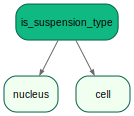

In [61]:
is_suspension_type.view_parents(with_children=True)

In [62]:
census.close()